# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

plt.ion()

In [5]:
# env = UnityEnvironment(file_name="Banana.app")
file_name_path="C:\\Users\\Huihui.Yang\\OneDrive - Shell\\Documents\\Huihui Working\\AI Data Engineer\\Training\\DRL\\deep-reinforcement-learning\\p1_navigation\\Banana_Windows_x86_64\\Banana_Windows_x86_64\\Banana.exe"
env = UnityEnvironment(file_name=file_name_path)


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [6]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
print(brain_name)
print(brain)

BananaBrain
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [7]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Initialize the agent

In [54]:
from dqn_agent import Agent
from model import QNetwork #, DuelingQNetwork

# initialize the agent 
#agent = Agent(state_size=state_size, action_size=action_size, qnetwork=QNetwork, update_type='double_dqn', seed=0)
agent = Agent(state_size=state_size, action_size=action_size, seed=0)

# uncomment the line below to use a dueling architecture
# agent = Agent(state_size=state_size, action_size=action_size, qnetwork=DuelingQNetwork, update_type='double_dqn', seed=0)

In [50]:
from dqn_agent_v1 import Agent
from model_v1 import QNetwork, DuelingQNetwork

# initialize the agent 
agent = Agent(state_size=state_size, action_size=action_size, qnetwork=QNetwork, update_type='double_dqn', seed=0)

# uncomment the line below to use a dueling architecture
# agent = Agent(state_size=state_size, action_size=action_size, qnetwork=DuelingQNetwork, update_type='double_dqn', seed=0)

### 4. Training the agent

In [64]:
def dqn(n_episodes, max_t, eps_start, eps_end, eps_decay):
    """
    Deep Q-learning
    
    Params
    ======
        n_episodes (int): number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy policy 
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) to decrease epsilon
    """
    
    scores = []                                               # list containing scores from each episode                 
    scores_window = deque(maxlen=100)                         # store only the last 100 scores
    eps = eps_start                                           # initialize epsilon (for epsilon-greedy policy)
    
    for i_episode in range(1, n_episodes + 1):                # run n_episodes
        print(i_episode)
        env_info = env.reset(train_mode=True)[brain_name]     # reset the environment
        state = env_info.vector_observations[0]               # get the initial state
        score = 0                                             # initialize the score
        
        for t in range(max_t):                                # run for maximum of max_t timesteps 
            action = agent.act(state, eps)                    # select the action
            action = action.astype(int)
            env_info = env.step(action)[brain_name] 
            next_state = env_info.vector_observations[0]      # get the state
            reward = env_info.rewards[0]                      # get the reward
            done = env_info.local_done[0]                     # whether the episode is complete or not
            
            agent.step(state, action, reward, next_state, done)  # train the agent 
            score += reward                                      # update the score
            
            state = next_state                                   # update the state
            if done:                                             # break if episode is complete
                break
        
        scores_window.append(score)                # update the window of scores
        scores.append(score)                       # update the list of scores
        eps = max(eps_end, eps * eps_decay)        # modify epsilon
        average_score = np.mean(scores_window)
        print('\rEpisode {} \tAverage score: {: .2f}'.format(i_episode, average_score), end="")
        
        print('check 2........')
        if i_episode % 100 == 0:
            print('\rEpisode {} \tAverage score: {: .2f}'.format(i_episode, average_score))
        print('check 3........')
        if average_score >= 13:      # check if environment is solved
            print('\nEnvironment solved in {: d} episodes!\tAverage Score: {: .2f}'.format(i_episode - 100, average_score))
            torch.save(agent.qnetwork_local.state_dict(), 'dqn_success.pth')
            break
        print('check 4........')
    return scores  

In [65]:
# parameters

n_episodes = 1000
max_t = 2000
eps_start = 1.0
eps_end = 0.1
eps_decay = 0.995

In [66]:
# train the agent
scores = dqn(n_episodes, max_t, eps_start, eps_end, eps_decay)

1
Episode 1 	Average score:  0.00check 2........
check 3........
check 4........
2
Episode 2 	Average score:  0.50check 2........
check 3........
check 4........
3
Episode 3 	Average score:  0.33check 2........
check 3........
check 4........
4
Episode 4 	Average score:  0.25check 2........
check 3........
check 4........
5
Episode 5 	Average score: -0.20check 2........
check 3........
check 4........
6
Episode 6 	Average score: -0.17check 2........
check 3........
check 4........
7
Episode 7 	Average score:  0.14check 2........
check 3........
check 4........
8
Episode 8 	Average score:  0.38check 2........
check 3........
check 4........
9
Episode 9 	Average score:  0.22check 2........
check 3........
check 4........
10
Episode 10 	Average score:  0.20check 2........
check 3........
check 4........
11
Episode 11 	Average score:  0.09check 2........
check 3........
check 4........
12
Episode 12 	Average score:  0.00check 2........
check 3........
check 4........
13
Episode 13 	Average

Episode 100 	Average score:  1.88check 2........
Episode 100 	Average score:  1.88
check 3........
check 4........
101
Episode 101 	Average score:  1.93check 2........
check 3........
check 4........
102
Episode 102 	Average score:  1.92check 2........
check 3........
check 4........
103
Episode 103 	Average score:  1.97check 2........
check 3........
check 4........
104
Episode 104 	Average score:  2.01check 2........
check 3........
check 4........
105
Episode 105 	Average score:  2.10check 2........
check 3........
check 4........
106
Episode 106 	Average score:  2.17check 2........
check 3........
check 4........
107
Episode 107 	Average score:  2.18check 2........
check 3........
check 4........
108
Episode 108 	Average score:  2.20check 2........
check 3........
check 4........
109
Episode 109 	Average score:  2.24check 2........
check 3........
check 4........
110
Episode 110 	Average score:  2.28check 2........
check 3........
check 4........
111
Episode 111 	Average score:  2.

Episode 196 	Average score:  5.98check 2........
check 3........
check 4........
197
Episode 197 	Average score:  6.05check 2........
check 3........
check 4........
198
Episode 198 	Average score:  6.09check 2........
check 3........
check 4........
199
Episode 199 	Average score:  6.13check 2........
check 3........
check 4........
200
Episode 200 	Average score:  6.17check 2........
Episode 200 	Average score:  6.17
check 3........
check 4........
201
Episode 201 	Average score:  6.15check 2........
check 3........
check 4........
202
Episode 202 	Average score:  6.25check 2........
check 3........
check 4........
203
Episode 203 	Average score:  6.29check 2........
check 3........
check 4........
204
Episode 204 	Average score:  6.31check 2........
check 3........
check 4........
205
Episode 205 	Average score:  6.38check 2........
check 3........
check 4........
206
Episode 206 	Average score:  6.41check 2........
check 3........
check 4........
207
Episode 207 	Average score:  6.

Episode 292 	Average score:  9.55check 2........
check 3........
check 4........
293
Episode 293 	Average score:  9.59check 2........
check 3........
check 4........
294
Episode 294 	Average score:  9.63check 2........
check 3........
check 4........
295
Episode 295 	Average score:  9.67check 2........
check 3........
check 4........
296
Episode 296 	Average score:  9.74check 2........
check 3........
check 4........
297
Episode 297 	Average score:  9.77check 2........
check 3........
check 4........
298
Episode 298 	Average score:  9.75check 2........
check 3........
check 4........
299
Episode 299 	Average score:  9.77check 2........
check 3........
check 4........
300
Episode 300 	Average score:  9.81check 2........
Episode 300 	Average score:  9.81
check 3........
check 4........
301
Episode 301 	Average score:  9.90check 2........
check 3........
check 4........
302
Episode 302 	Average score:  9.88check 2........
check 3........
check 4........
303
Episode 303 	Average score:  9.

Episode 388 	Average score:  11.62check 2........
check 3........
check 4........
389
Episode 389 	Average score:  11.71check 2........
check 3........
check 4........
390
Episode 390 	Average score:  11.76check 2........
check 3........
check 4........
391
Episode 391 	Average score:  11.77check 2........
check 3........
check 4........
392
Episode 392 	Average score:  11.80check 2........
check 3........
check 4........
393
Episode 393 	Average score:  11.76check 2........
check 3........
check 4........
394
Episode 394 	Average score:  11.75check 2........
check 3........
check 4........
395
Episode 395 	Average score:  11.72check 2........
check 3........
check 4........
396
Episode 396 	Average score:  11.75check 2........
check 3........
check 4........
397
Episode 397 	Average score:  11.77check 2........
check 3........
check 4........
398
Episode 398 	Average score:  11.81check 2........
check 3........
check 4........
399
Episode 399 	Average score:  11.82check 2........
chec

Episode 483 	Average score:  12.94check 2........
check 3........
check 4........
484
Episode 484 	Average score:  12.93check 2........
check 3........
check 4........
485
Episode 485 	Average score:  13.00check 2........
check 3........

Environment solved in  385 episodes!	Average Score:  13.00


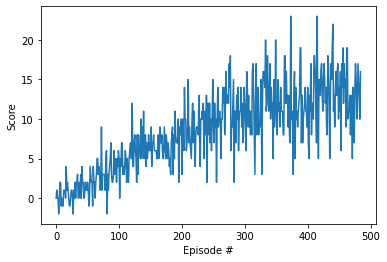

In [67]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.savefig('results/dddqn_new_scores.png', bbox_inches='tight')
plt.show()

When finished, you can close the environment.

### 5. Watch a trained model in action

Choose the checkpoint to load as per the variant of DQN used. If the original DQN is used without any changes,
load the checkpoint `dqn.pth`, for Double DQN use `ddqn.pth`, for Dueling Double DQN use `dddqn.pth`.

In [68]:
agent.qnetwork_local.load_state_dict(torch.load('dqn_success.pth'))

<All keys matched successfully>

In [70]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = agent.act(state)                      # select an action
    action = action.astype(int)
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 16.0


In [71]:
env.close()